<a href="https://colab.research.google.com/github/itsmesanju/MSDS/blob/main/dtsa5510_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Description**

This project utilizes data ((https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) from the Global Health Observatory (GHO) under the World Health Organization (WHO) to explore factors influencing life expectancy across 193 countries. The dataset, which includes critical health-related indicators and economic data from the United Nations, covers the years 2000-2015. These indicators are believed to significantly impact life expectancy.

The dataset comprises 22 columns and 2938 rows, encompassing 20 predictive variables categorized into Immunization factors, Mortality factors, Economic factors, and Social factors.

This project employs unsupervised learning classification techniques to cluster countries with similar characteristics, aiming to uncover underlying patterns, groupings, and relationships within the data to gain insights into the determinants of life expectancy.

#**Import Libraries and Load Data**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
%matplotlib inline
from sklearn.svm import SVC

**Load Data**

In [77]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

file_path = '/content/drive/MyDrive/DTSA5510_life_expectancy_data.csv'
data = pd.read_csv(file_path)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#**Exploratory Data Analysis (EDA) — and Clean the Data**

##**Basic Inspection**

In [78]:
data.shape

(2938, 22)

In [79]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observations based on above analysis:**

*   There are some missing values
*   Except Country and Status, other columns are numbers
*   Some column names have spaces

In [81]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Data Cleanup and Understanding Data

**Missing Data and Data Imputing**


In [82]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [83]:
countries_with_missing_values = data['Country'].unique()
print(len(countries_with_missing_values))

193


**Fix column name by removing the spacess**


In [84]:
columns=data.columns.to_list()
columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [85]:
columns[3]="Life expectancy"
columns[9]="Measles"
columns[10]="BMI"
columns[11]="Under-5 Deaths"
columns[14]="Diphtheria"
columns[15]="HIV/AIDS"
columns[18]="thinness 1-19 years"
columns[19]="thinness 5-9 years"
data.columns=columns
fixed_columns=data.columns.to_list()
fixed_columns

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-5 Deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

To handle missing values, we first identified countries with incomplete data and explored several imputation techniques, including mean imputation, median imputation, mode imputation, forward/backward fill, linear interpolation, K-Nearest Neighbors (KNN) imputation, and Multiple Imputation by Chained Equations (MICE).

In [86]:
import pandas as pd
from sklearn.impute import KNNImputer

# Identify countries with missing values before imputation
missing_data = data[data.isna().any(axis=1)]['Country'].unique()
print(missing_data)
print(len(missing_data))

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[float, int])), columns=data.select_dtypes(include=[float, int]).columns)

data[data_imputed.columns] = data_imputed

missing_data = data[data.isna().any(axis=1)]['Country'].unique()
print(missing_data)
print(len(missing_data))


['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israe

In [87]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-5 Deaths                     0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Now lets visualise the data. Seaborn's pairplot can be useful to see the relationships between different pairs of features.



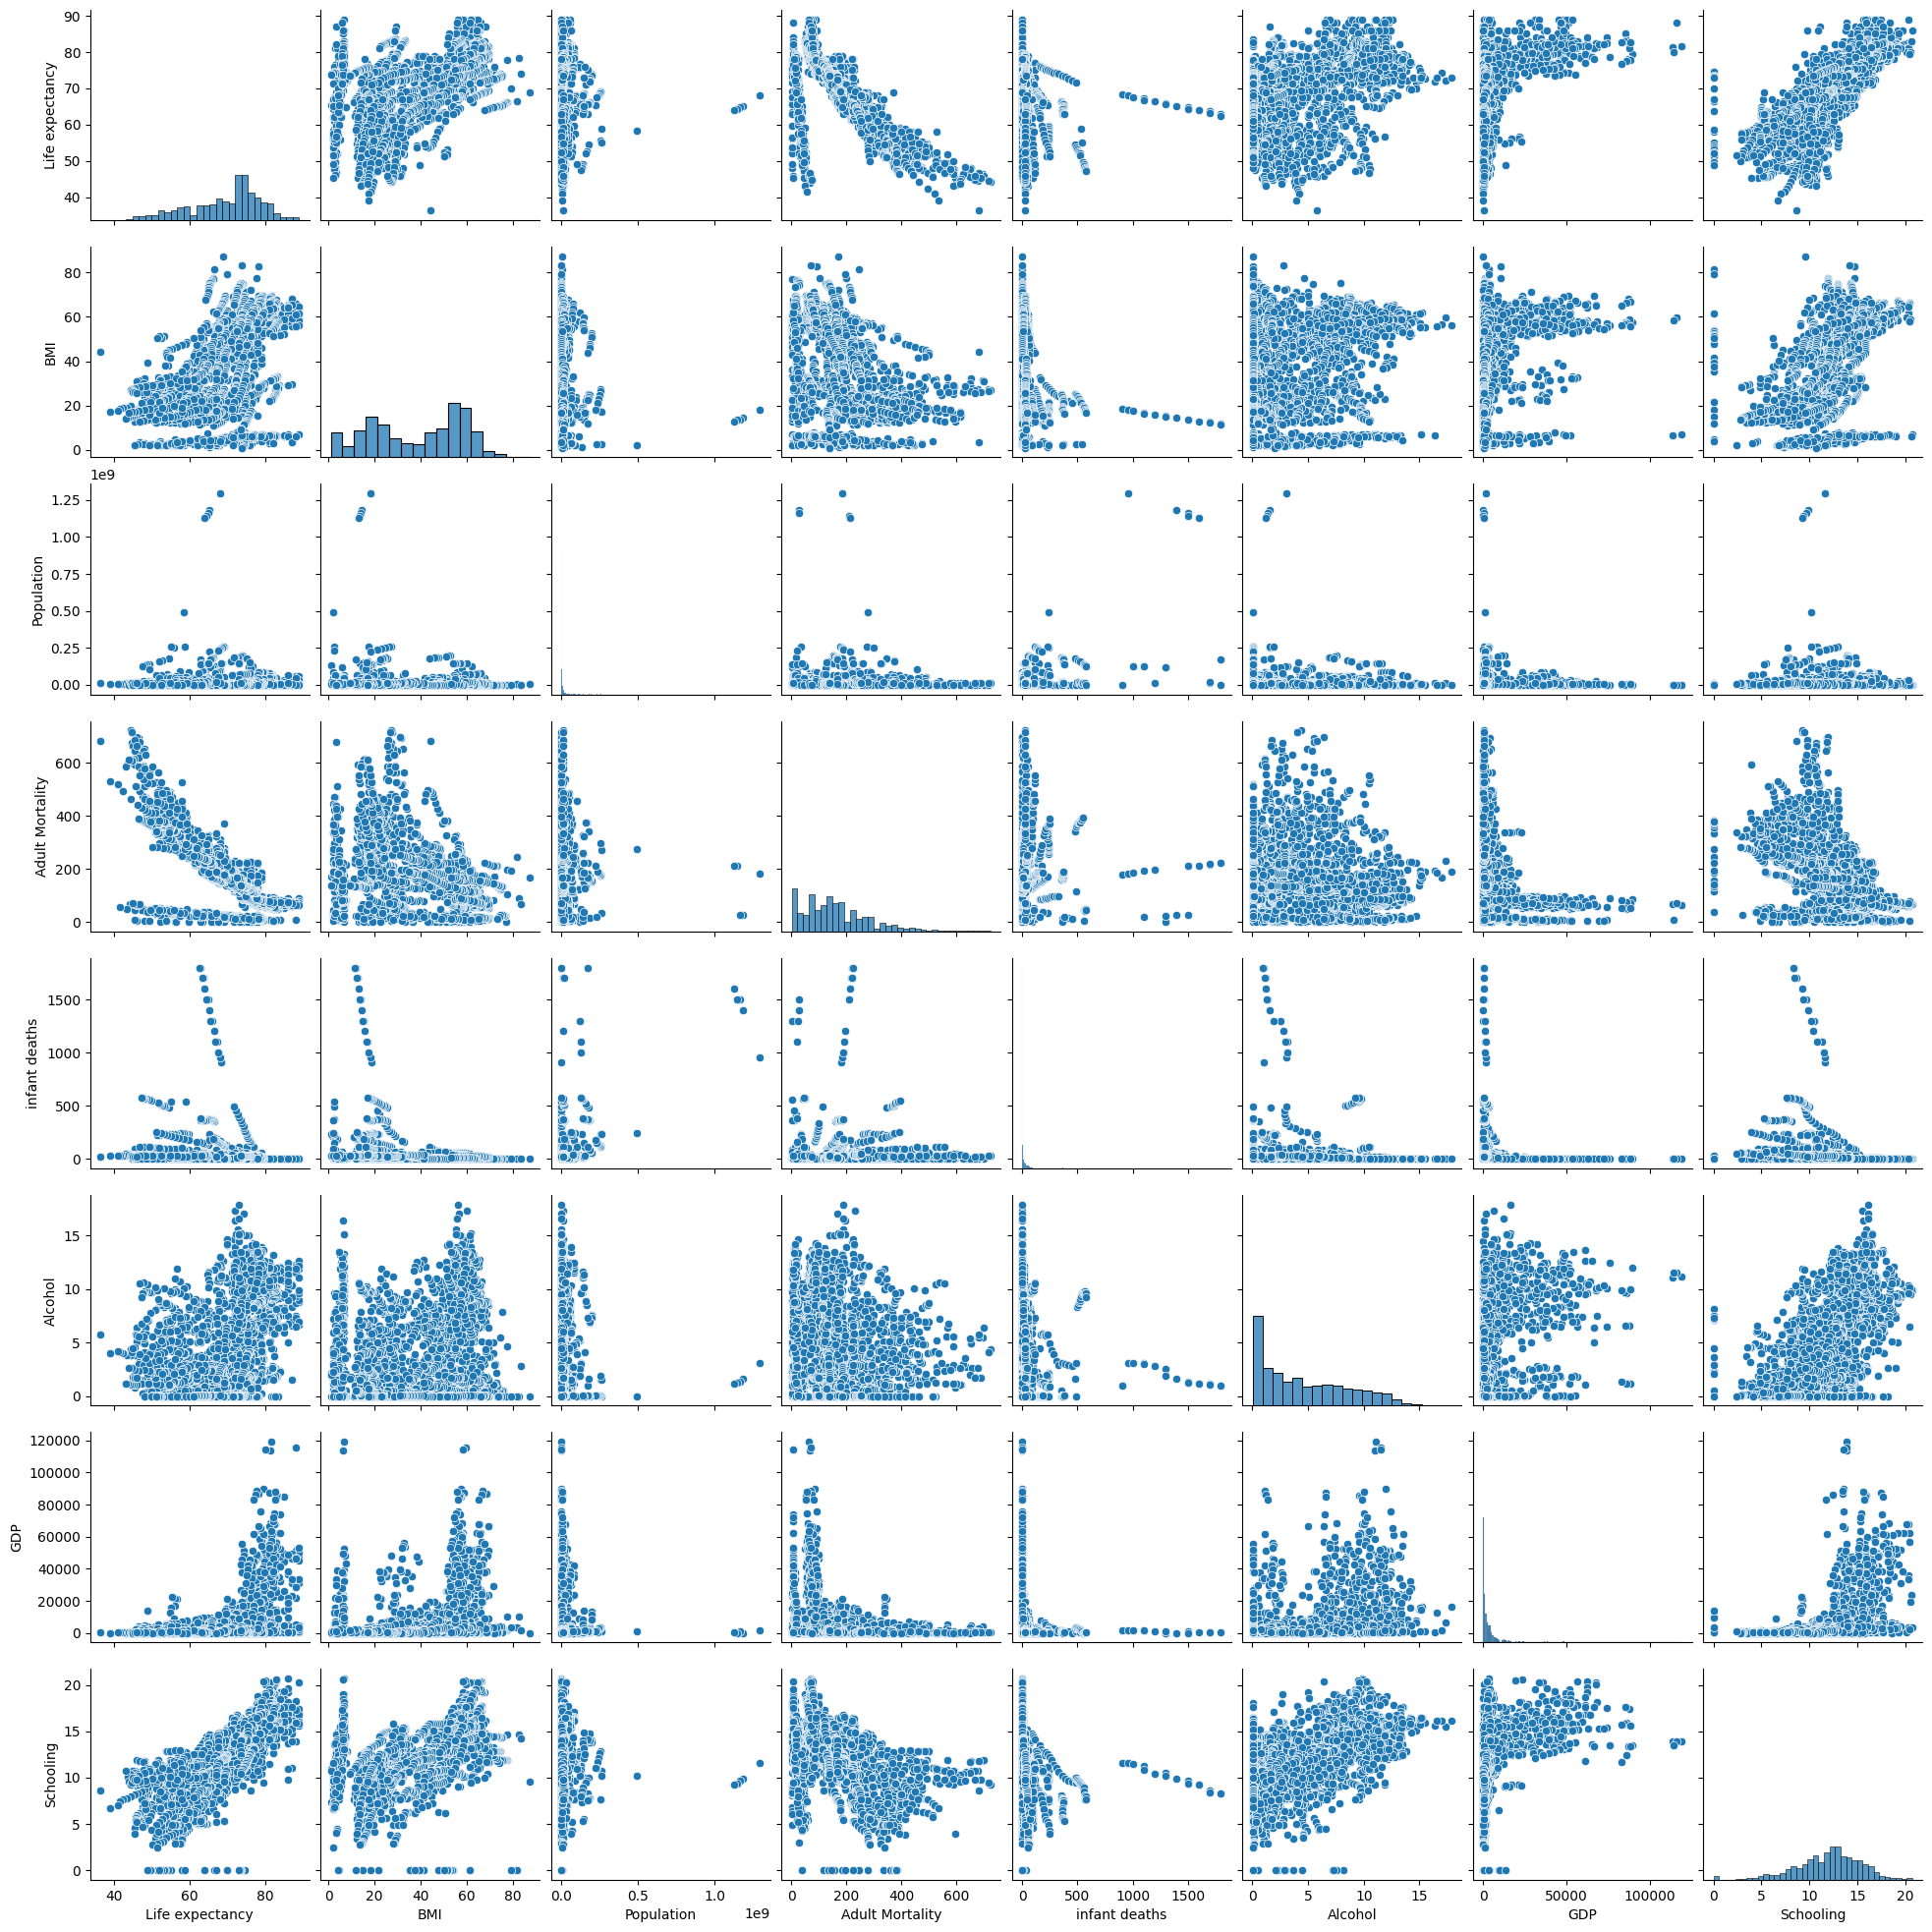

In [88]:
# Pairplot for selected columns
sns.pairplot(data[['Life expectancy', 'BMI', 'Population', 'Adult Mortality', 'infant deaths', 'Alcohol', 'GDP', 'Schooling']])
plt.show()

**Coorrelation Analysis**

Let us see if some feature correlations are in line with our original assumptions

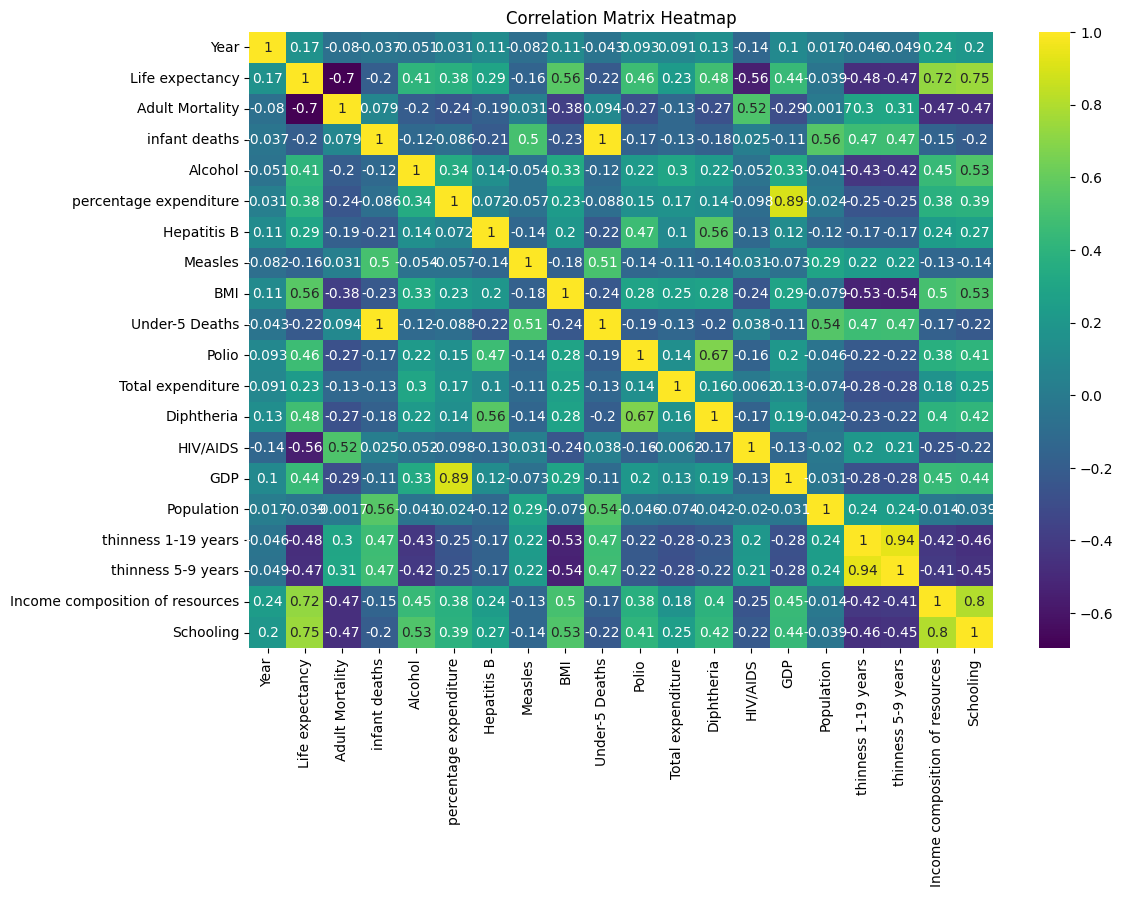

In [89]:
#Correlation Analysis

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()


Spending on health and education appears to positively correlate with life expectancy, while HIV/AIDS prevalence and malnutrition show a negative correlation.

**Trend Analysis**


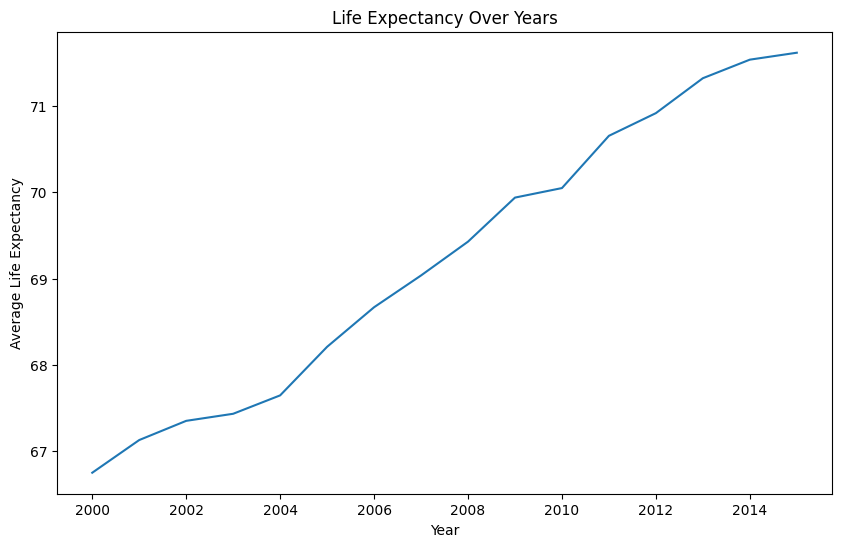

In [90]:
plt.figure(figsize=(10, 6))
data.groupby('Year')['Life expectancy'].mean().plot(kind='line')
plt.ylabel('Average Life Expectancy')
plt.title('Life Expectancy Over Years')
plt.show()

Life expectancy
Skew : -0.64


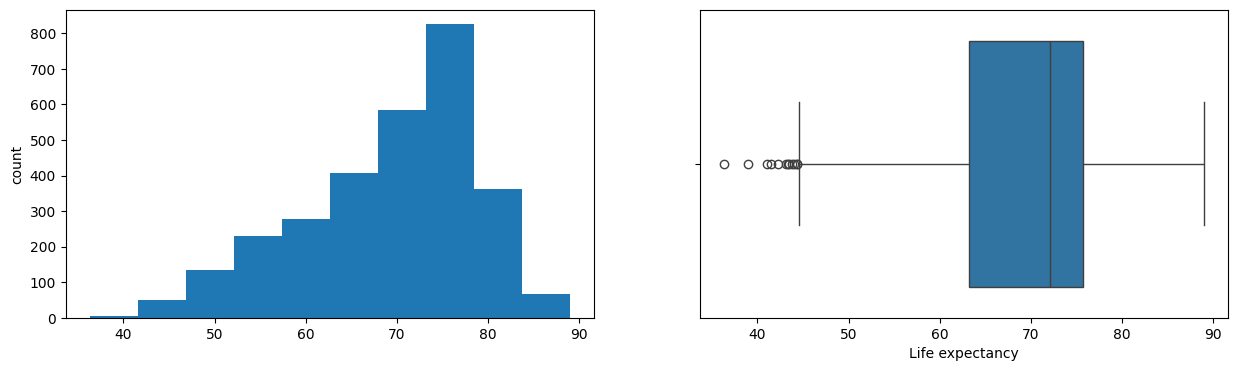

GDP
Skew : 3.48


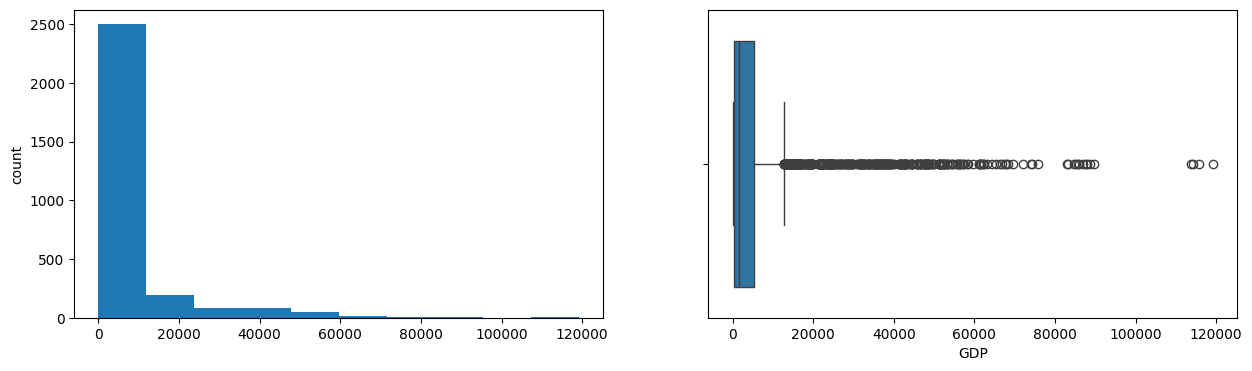

Income composition of resources
Skew : -1.11


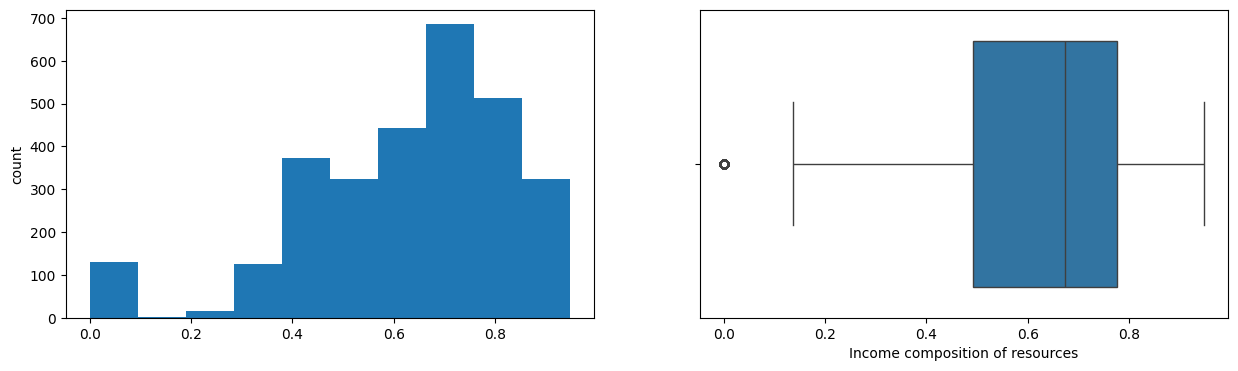

Total expenditure
Skew : 0.63


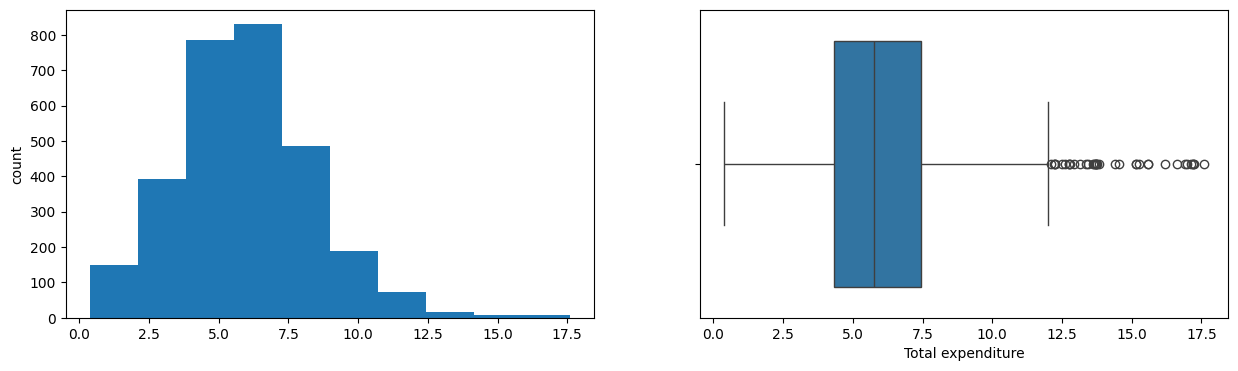

Schooling
Skew : -0.58


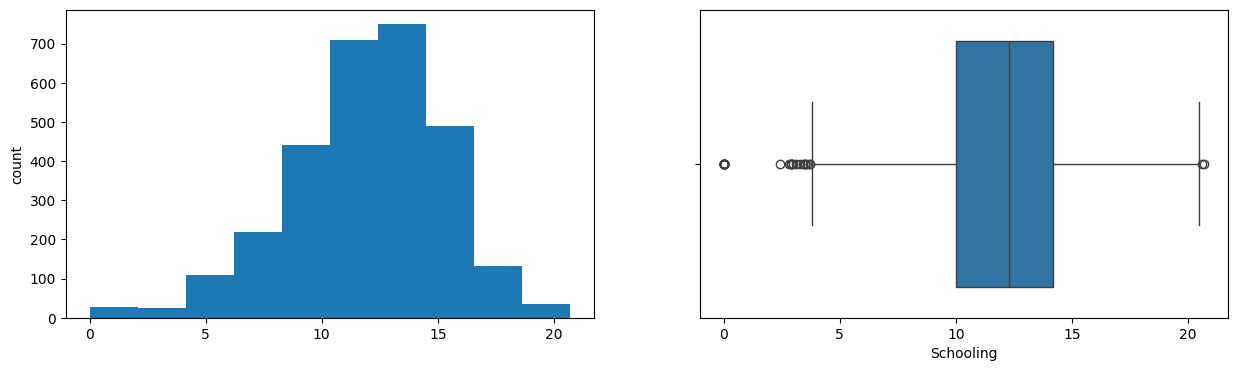

infant deaths
Skew : 9.79


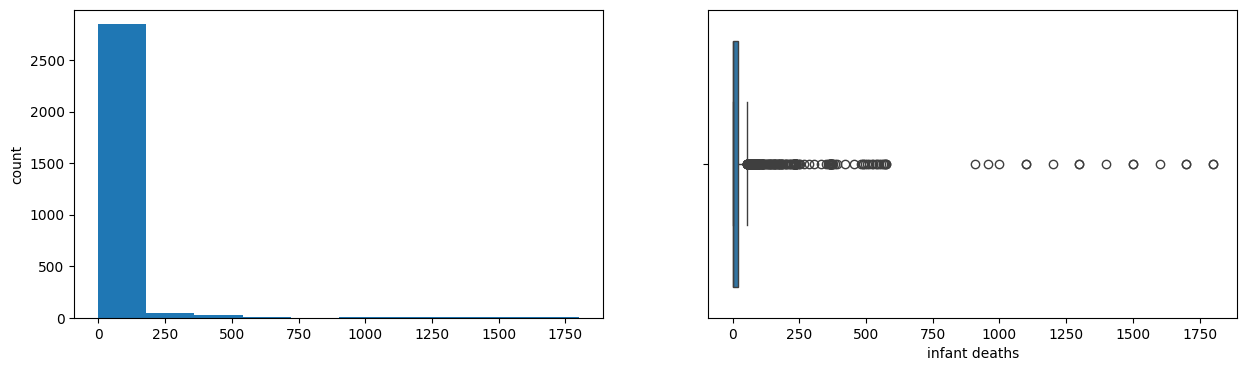

In [91]:
for col in ['Life expectancy', 'GDP', 'Income composition of resources', 'Total expenditure','Schooling','infant deaths']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

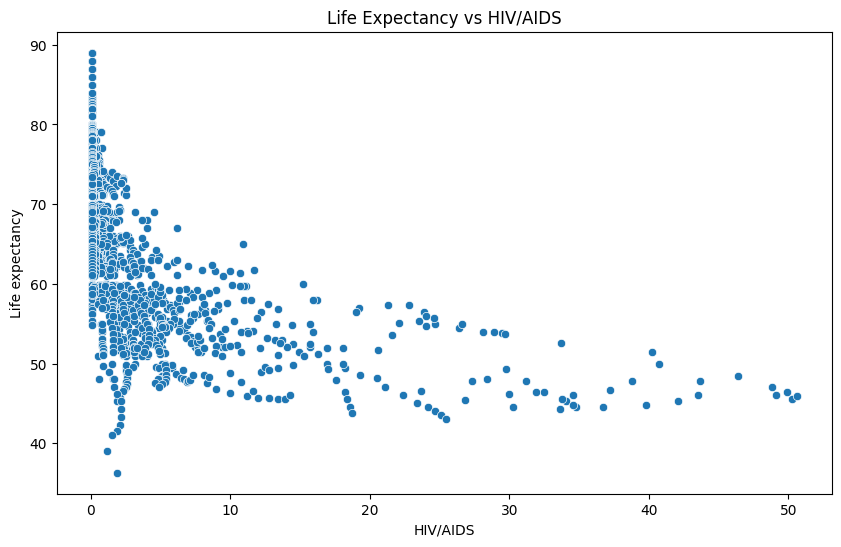

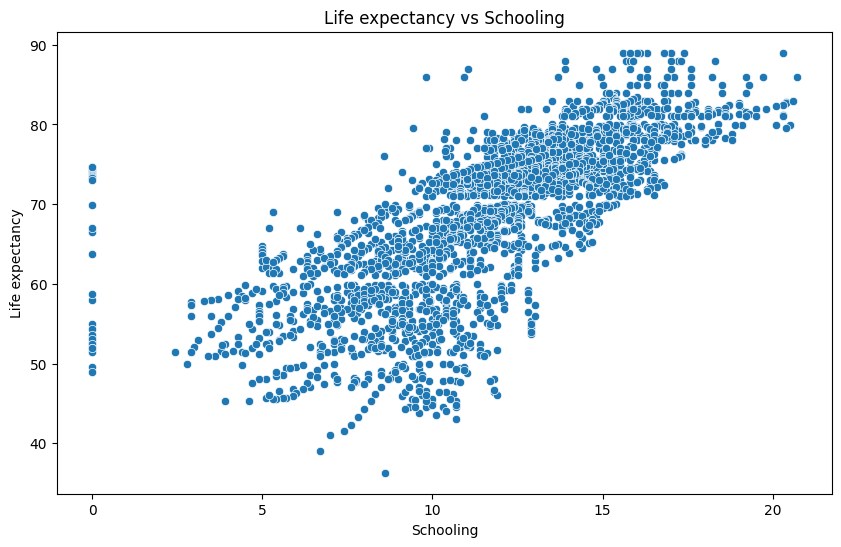

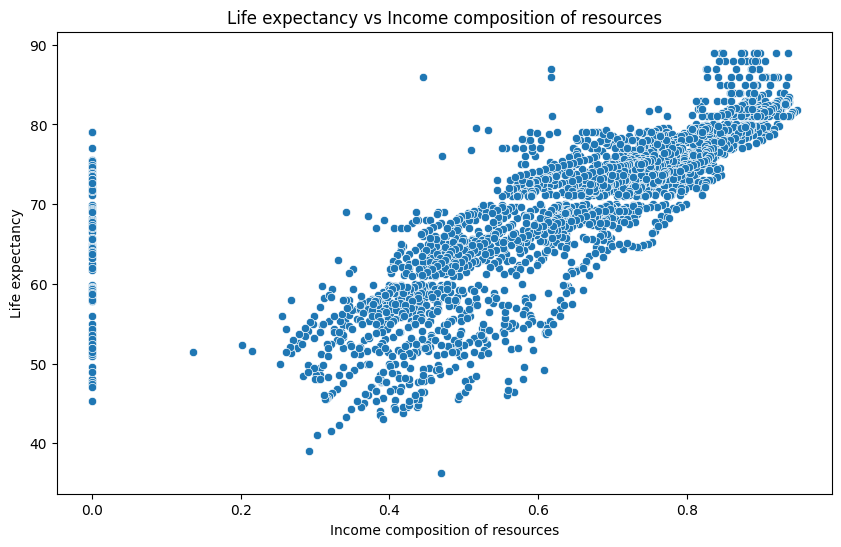

In [92]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HIV/AIDS', y='Life expectancy', data=data)
plt.title('Life Expectancy vs HIV/AIDS')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy', data=data)
plt.title('Life expectancy vs Schooling')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income composition of resources', y='Life expectancy', data=data)
plt.title('Life expectancy vs Income composition of resources')
plt.show()



#Model Building

We would try following models for this classification task:


*   KNN (nearest Neighbors)
*   DBSCAN
*   Gaussian

We would try following steps for these models:


*   Train model
*   Look at feature importance and best params
*   Plot generated clusters
*   Analyze generated clusters to see if they make sense based on our requirement


## Principal component analysis



In [93]:
data_fixed = data.drop(['Year'], axis=1)

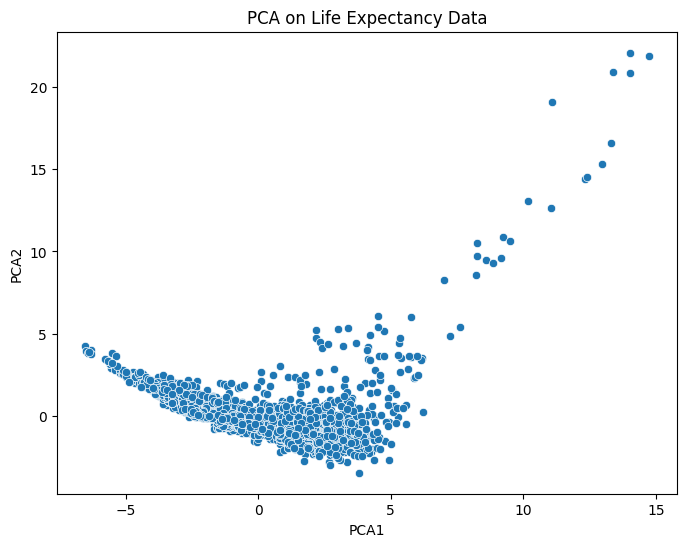

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_fixed_features = data_fixed.drop(['Life expectancy'], axis=1)

numerical_features = data_fixed_features.select_dtypes(include=['float64', 'int64'])

# Scaling the features to have a mean of 0 and unit
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


# Create a DataFrame with the PCA results
data_pca = pd.DataFrame(data = pca_result, columns = ['PCA1', 'PCA2'])

# Create a DataFrame with the PCA results
data_fixed.reset_index(drop=True, inplace=True)
data_pca.reset_index(drop=True, inplace=True)
data_with_pca = pd.concat([data_fixed, data_pca], axis=1)

# Visualize PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca)
plt.title('PCA on Life Expectancy Data')
plt.show()

In [95]:
# Feature Importance - Which features contribute the most to the components
def pca_feature_importance(pca, features):
    importance_df = pd.DataFrame(pca.components_, columns=features.columns, index=['PCA1', 'PCA2'])
    return importance_df.T

importance_df = pca_feature_importance(pca, numerical_features)
print(importance_df)


                                     PCA1      PCA2
Adult Mortality                  0.224353 -0.207553
infant deaths                    0.229388  0.470383
Alcohol                         -0.235203  0.137230
percentage expenditure          -0.207051  0.216274
Hepatitis B                     -0.179625 -0.002571
Measles                          0.149512  0.312738
BMI                             -0.280882  0.068881
Under-5 Deaths                   0.234787  0.462792
Polio                           -0.223417  0.093000
Total expenditure               -0.153762  0.007405
Diphtheria                      -0.229387  0.092118
HIV/AIDS                         0.136377 -0.144896
GDP                             -0.229311  0.223828
Population                       0.119713  0.391683
thinness 1-19 years              0.317418  0.116249
thinness 5-9 years               0.316672  0.119348
Income composition of resources -0.304590  0.215199
Schooling                       -0.323602  0.193789


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


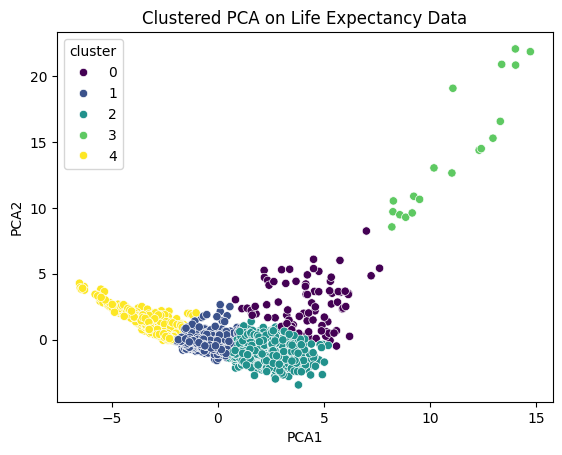

Number of outliers detected: 1228


In [96]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

# Clustering Analysis using KMeans
kmeans = KMeans(n_clusters=5)
data_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize the clustering
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data_pca, palette='viridis')
plt.title('Clustered PCA on Life Expectancy Data')
plt.show()

# Anomaly Detection using Z-score
# Calculating the absolute Z-score for each observation
z_scores = np.abs(zscore(scaled_features))

# Define a threshold for identifying outliers
threshold = 3

# Find rows where any column has a Z-score greater than the threshold
outliers = np.where(z_scores > threshold)

# Outlier DataFrame
outlier_data = data_fixed.iloc[outliers[0]]

print(f"Number of outliers detected: {outlier_data.shape[0]}")

## KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.237


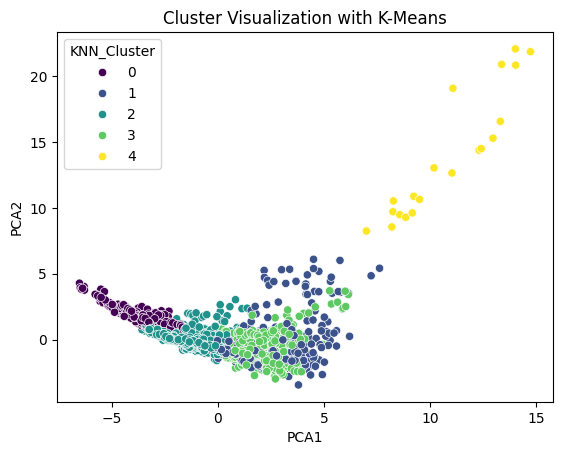

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Choosing the number of clusters with KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the KMeans model
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster IDs to the original data
data_with_pca['KNN_Cluster'] = clusters

# Calculating the silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for {k} clusters: {silhouette_avg:.3f}')

# Visualizing the clusters (if you have PCA applied, you can plot the first two principal components)
# If you don't have PCA components, replace 'PCA1' and 'PCA2' with your chosen features
sns.scatterplot(x='PCA1', y='PCA2', hue='KNN_Cluster', data=data_with_pca, palette='viridis')
plt.title('Cluster Visualization with K-Means')
plt.show()

**Let us find optimal number of clusters**

In [98]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score using the scaled features and the cluster labels
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for {k} clusters: {silhouette_avg:.3f}')

# You might want to calculate the silhouette score for different values of k to determine the optimal number of clusters
for n_clusters in range(2, 10):  # Example range from 2 to 9 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')


Silhouette Score for 5 clusters: 0.237


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.264


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.237


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.230


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.230


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.163


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.164


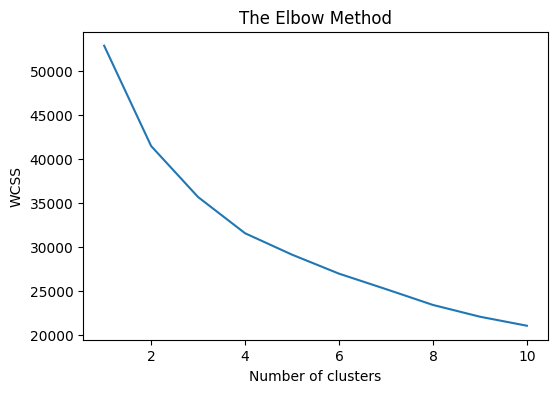

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try different numbers of clusters
for i in range(1, 11):  # Let's try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The Elbow'
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


For n_clusters=4, the silhouette score is: 0.252


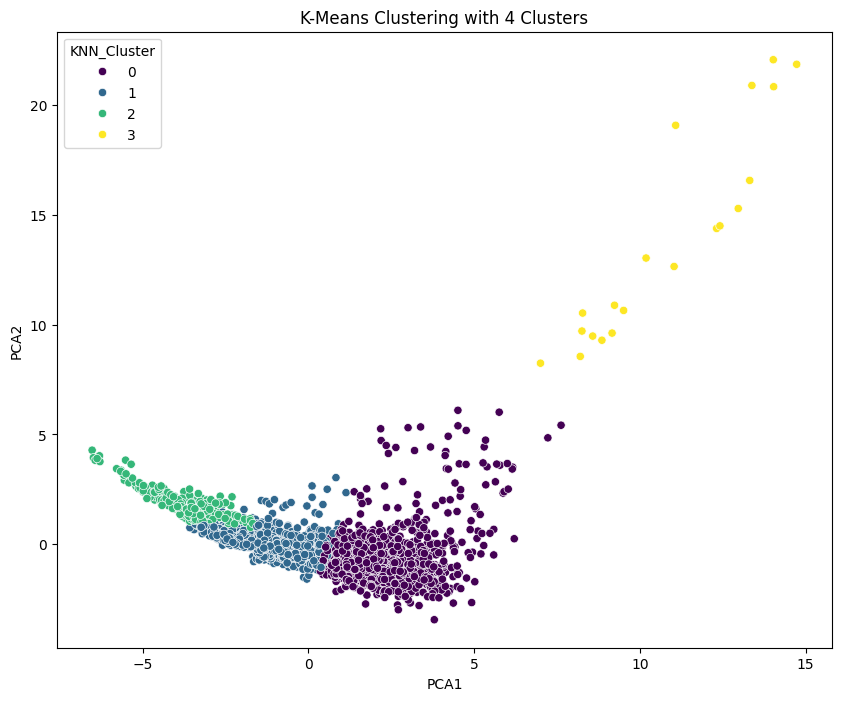

In [100]:
from sklearn.metrics import silhouette_score

# Run K-Means with the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

# Calculate silhouette score for the optimal number of clusters
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'For n_clusters={optimal_clusters}, the silhouette score is: {silhouette_avg:.3f}')

# Plotting the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]
data_with_pca['KNN_Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KNN_Cluster', data=data_with_pca, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.show()


             Life expectancy  Adult Mortality  infant deaths   Alcohol  \
KNN_Cluster                                                              
0                  60.133821       252.261066      48.976513  2.400231   
1                  74.000140       118.704949       6.658629  5.518452   
2                  80.802553        64.021277       0.774468  8.667319   
3                  61.925000       124.150000    1207.000000  3.418900   

             percentage expenditure  Hepatitis B       Measles        BMI  \
KNN_Cluster                                                                 
0                         90.943009    69.712737   4080.158988  22.222258   
1                        371.225110    88.780203    659.635787  47.650596   
2                       6309.152409    84.604255    751.906383  52.814043   
3                         30.340323    41.390000  68787.100000  15.425000   

             Under-5 Deaths      Polio  ...  Diphtheria  HIV/AIDS  \
KNN_Cluster            

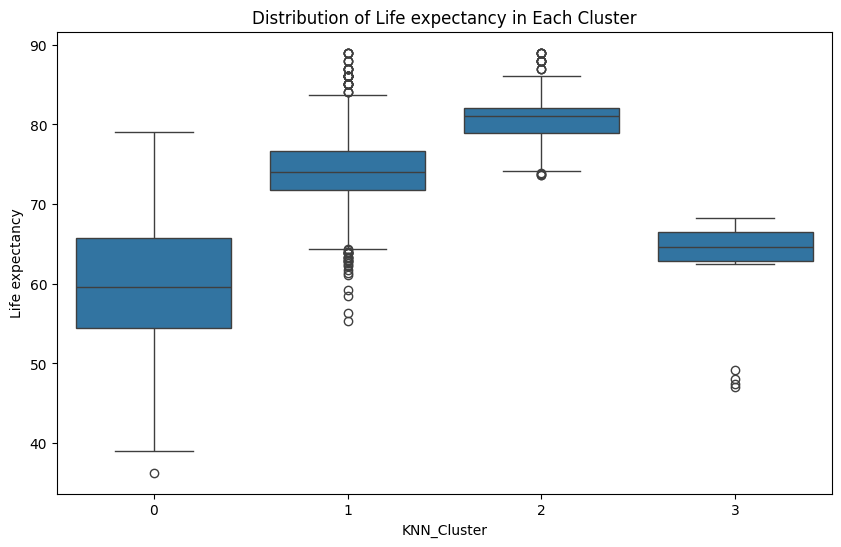

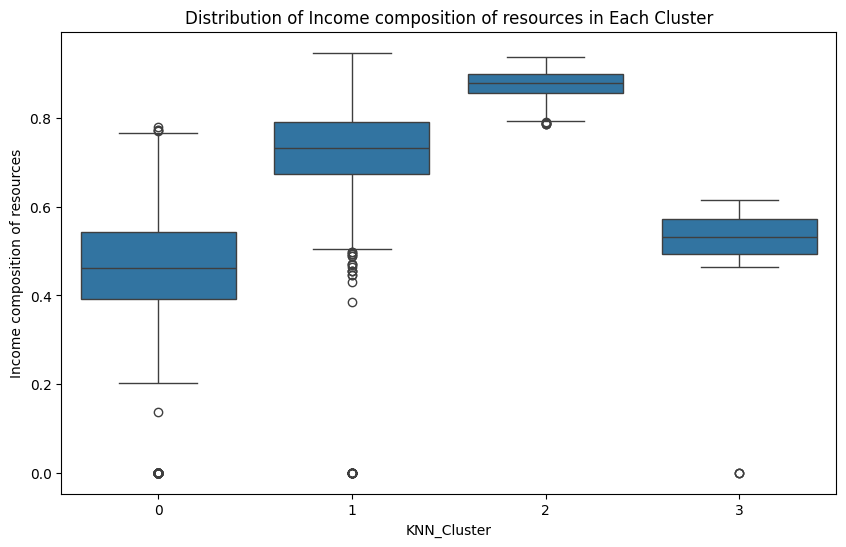

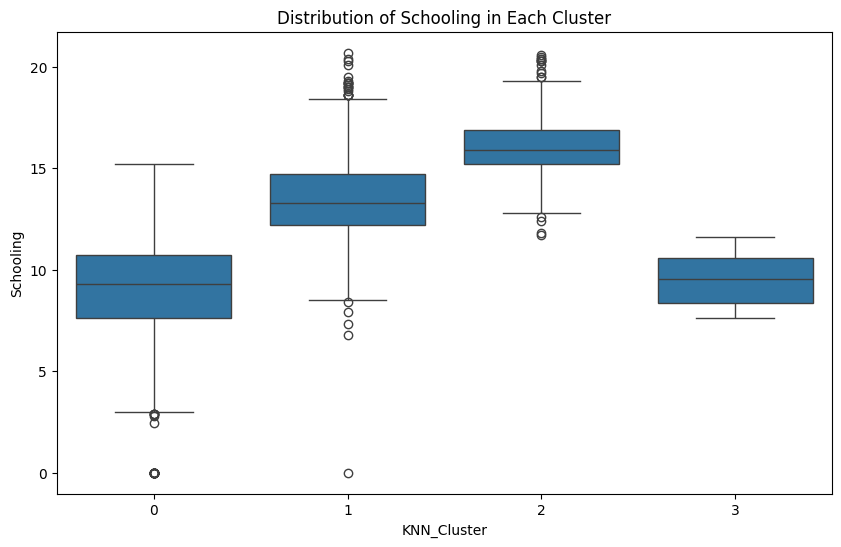

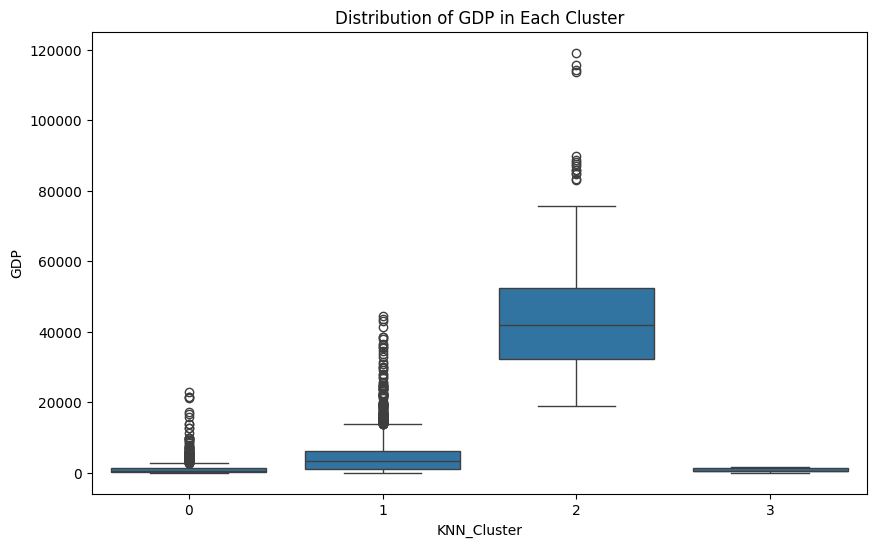

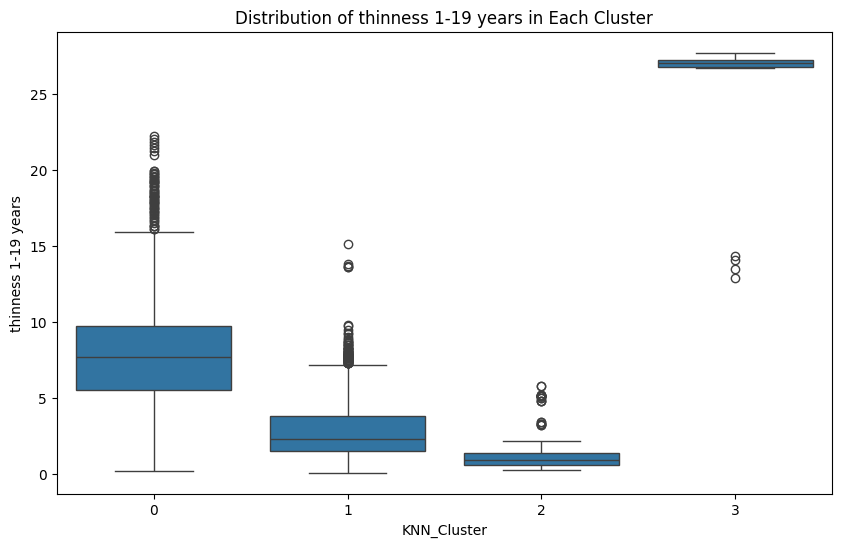

In [101]:
non_numeric_cols = data_with_pca.select_dtypes(exclude=[float, int]).columns
numeric_data_with_pca = data_with_pca.drop(columns=non_numeric_cols)

# Profile each cluster by computing the mean of numeric columns
cluster_profiles = numeric_data_with_pca.groupby('KNN_Cluster').mean()
print(cluster_profiles)

for col in ['Life expectancy', 'Income composition of resources', 'Schooling', 'GDP', 'thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='KNN_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()



In [102]:
# Group data by cluster label and list countries in each cluster
clustered_countries = data_with_pca.groupby('KNN_Cluster')['Country'].unique()

for cluster in clustered_countries.index:
    print(f"Countries in Cluster {cluster}:")
    print(clustered_countries[cluster])
    print("\n")


Countries in Cluster 0:
['Afghanistan' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Azerbaijan'
 'Bangladesh' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana'
 'Burkina Faso' 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'China' 'Colombia' 'Comoros'
 'Congo' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Fiji' 'Gabon' 'Gambia'
 'Georgia' 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Indonesia' 'Iraq' 'Jamaica' 'Kenya' 'Kiribati'
 "Lao People's Democratic Republic" 'Lebanon' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Mauritania'
 'Micronesia (Federated States of)' 'Montenegro' 'Morocco' 'Mozambique'
 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Oman'
 'Pakistan' 'Panama' 'Papua New Guinea' 'Peru' 'Philippines'
 'Republic of Moldova' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the G

## DBSCAN

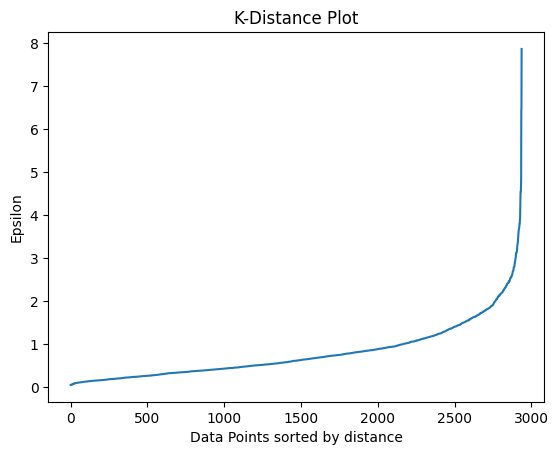

In [103]:
from sklearn.neighbors import NearestNeighbors

# Finding the optimal eps value using a K-Distance Plot
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort distance values by ascending value
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


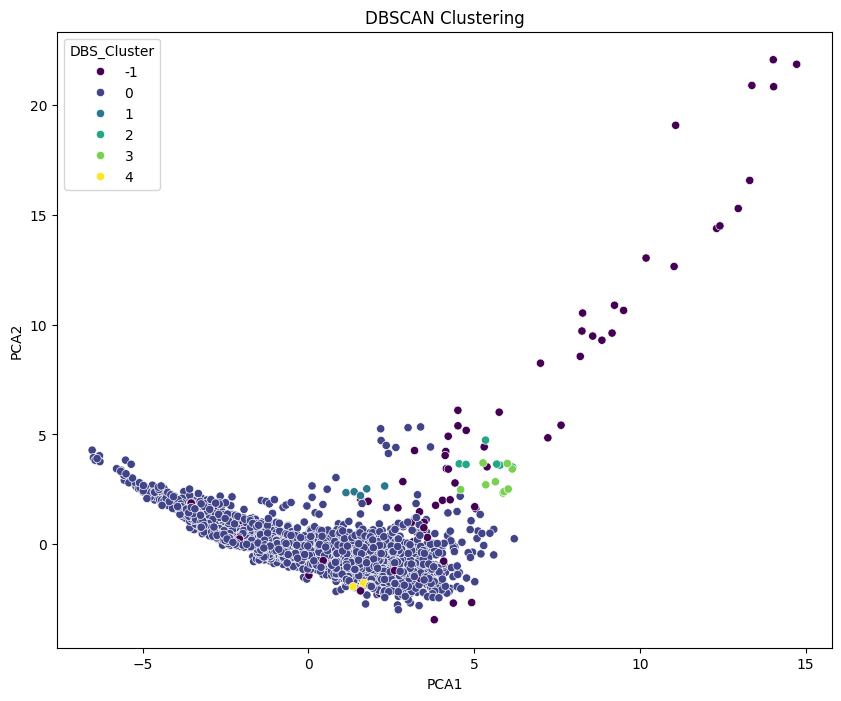

In [104]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
# had to try different values to get to eps value
dbscan = DBSCAN(eps=3.0, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

# Add the cluster labels to the original data
data_with_pca['DBS_Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBS_Cluster', data=data_with_pca, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


             Life expectancy  Adult Mortality  infant deaths   Alcohol  \
DBS_Cluster                                                              
-1                 63.209024       202.017073     416.268293  4.002390   
 0                 69.497606       163.377684      16.818503  4.609484   
 1                 67.420000       158.200000     148.800000  0.070000   
 2                 53.283333       382.500000     531.333333  9.201667   
 3                 63.988889       140.777778     367.000000  0.075333   
 4                 46.600000        64.000000       8.500000  5.210000   

             percentage expenditure  Hepatitis B       Measles        BMI  \
DBS_Cluster                                                                 
-1                       468.237318    48.195122  31749.548780  23.734146   
 0                       751.672118    82.006780   1530.217514  38.836857   
 1                       122.654422    77.600000  19670.800000  17.920000   
 2                    

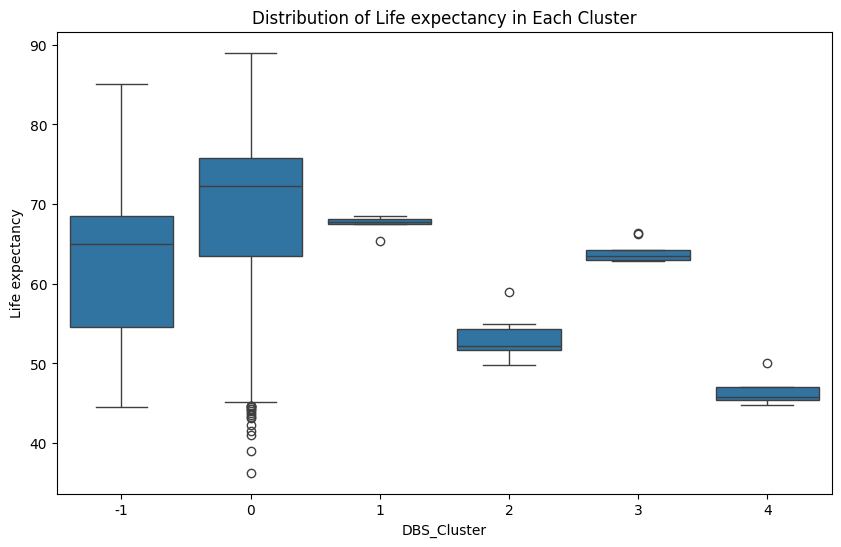

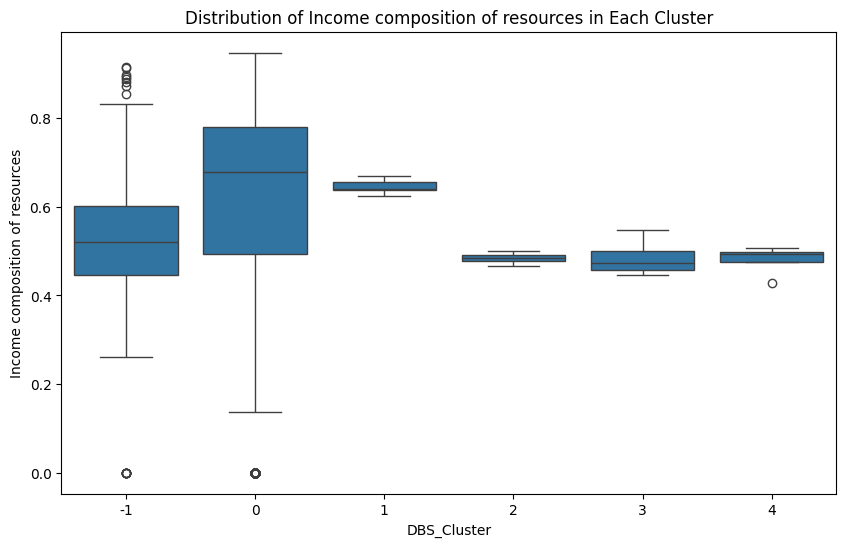

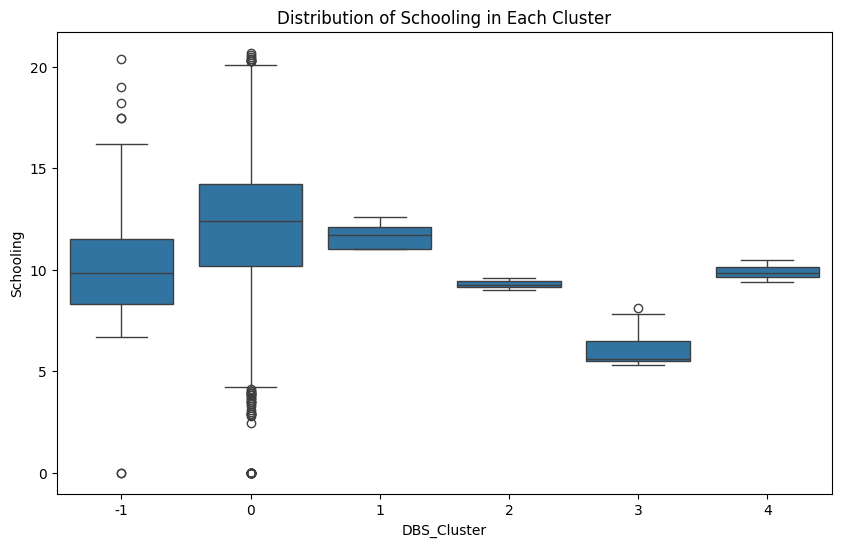

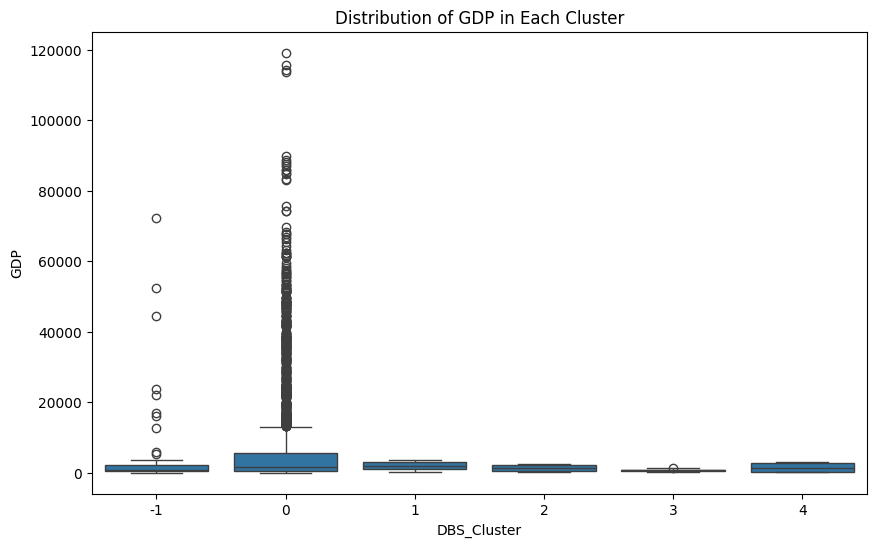

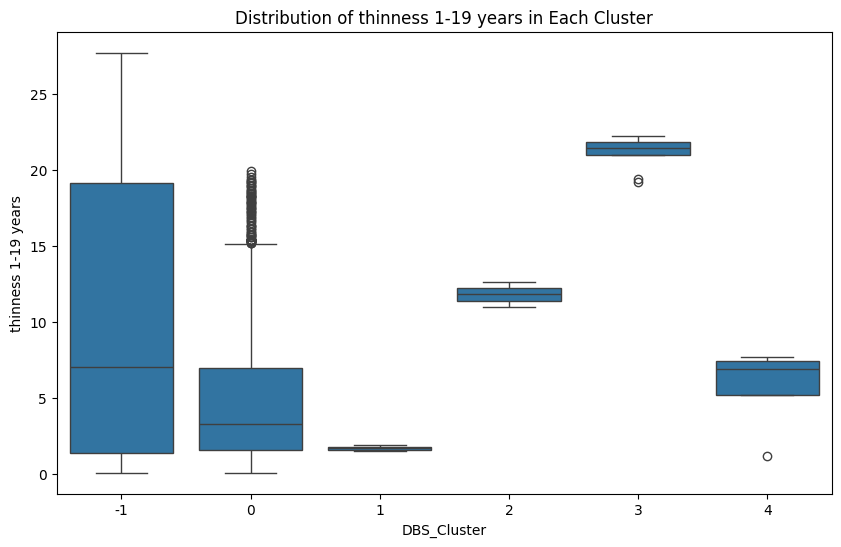

In [105]:
# Profile each cluster
non_numeric_cols = data_with_pca.select_dtypes(exclude=[float, int]).columns
numeric_data_with_pca = data_with_pca.drop(columns=non_numeric_cols)

# Profile each cluster by computing the mean of numeric columns
cluster_profiles = numeric_data_with_pca.groupby('DBS_Cluster').mean()
print(cluster_profiles)

for col in ['Life expectancy', 'Income composition of resources', 'Schooling', 'GDP', 'thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DBS_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()

## GaussianMixture

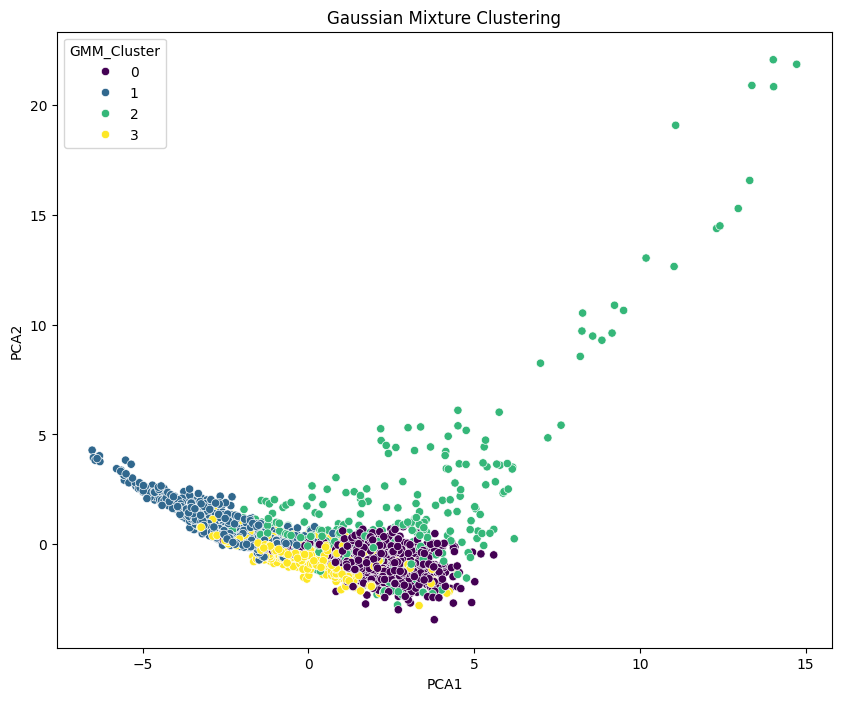

In [106]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm_clusters = gmm.fit_predict(scaled_features)

# Add the cluster labels to your original data
data_with_pca['GMM_Cluster'] = gmm_clusters

# Visualizing the clusters (using PCA for a 2D representation)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=data_with_pca, palette='viridis')
plt.title('Gaussian Mixture Clustering')
plt.show()

             Life expectancy  Adult Mortality  infant deaths   Alcohol  \
DBS_Cluster                                                              
-1                 63.209024       202.017073     416.268293  4.002390   
 0                 69.497606       163.377684      16.818503  4.609484   
 1                 67.420000       158.200000     148.800000  0.070000   
 2                 53.283333       382.500000     531.333333  9.201667   
 3                 63.988889       140.777778     367.000000  0.075333   
 4                 46.600000        64.000000       8.500000  5.210000   

             percentage expenditure  Hepatitis B       Measles        BMI  \
DBS_Cluster                                                                 
-1                       468.237318    48.195122  31749.548780  23.734146   
 0                       751.672118    82.006780   1530.217514  38.836857   
 1                       122.654422    77.600000  19670.800000  17.920000   
 2                    

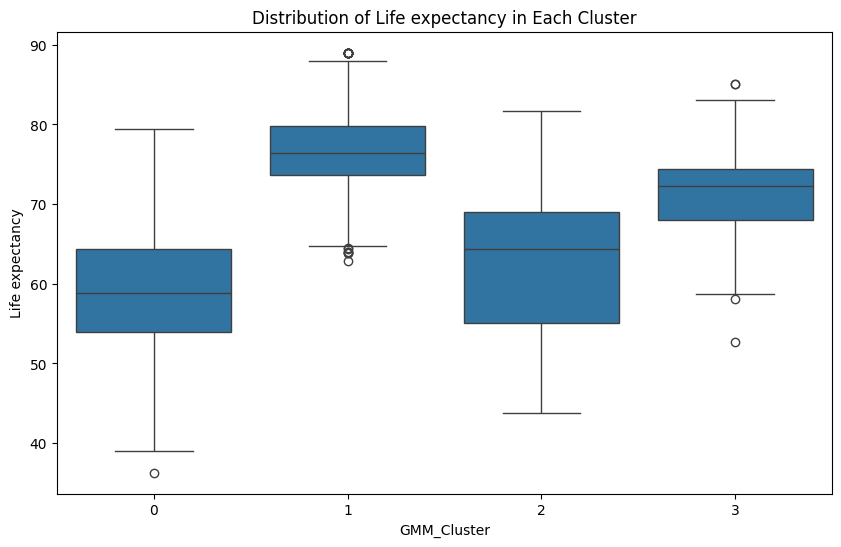

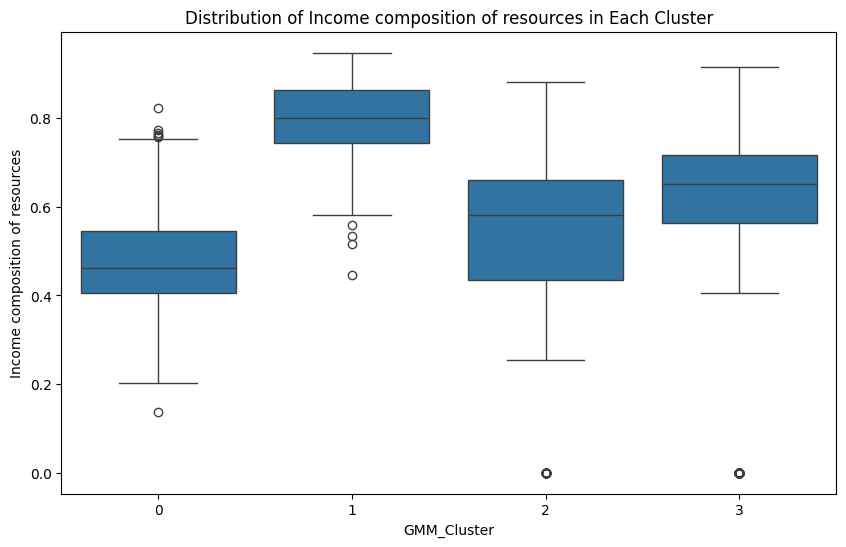

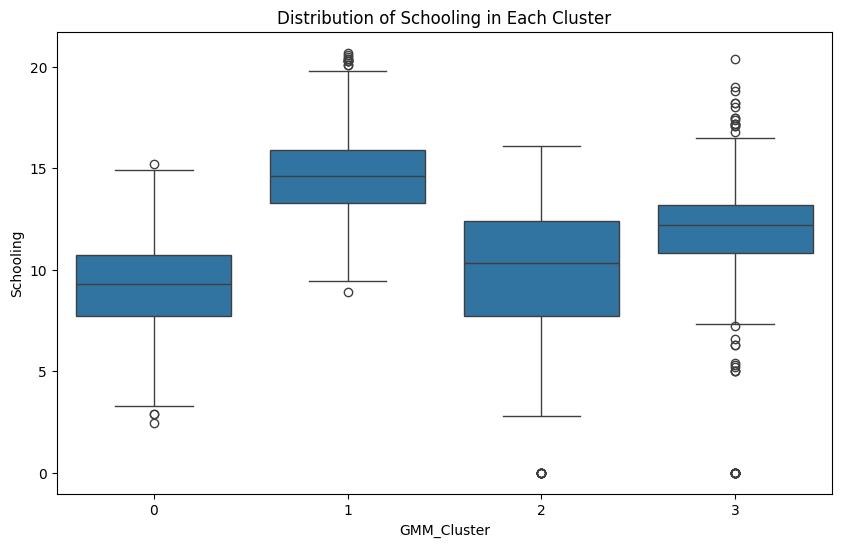

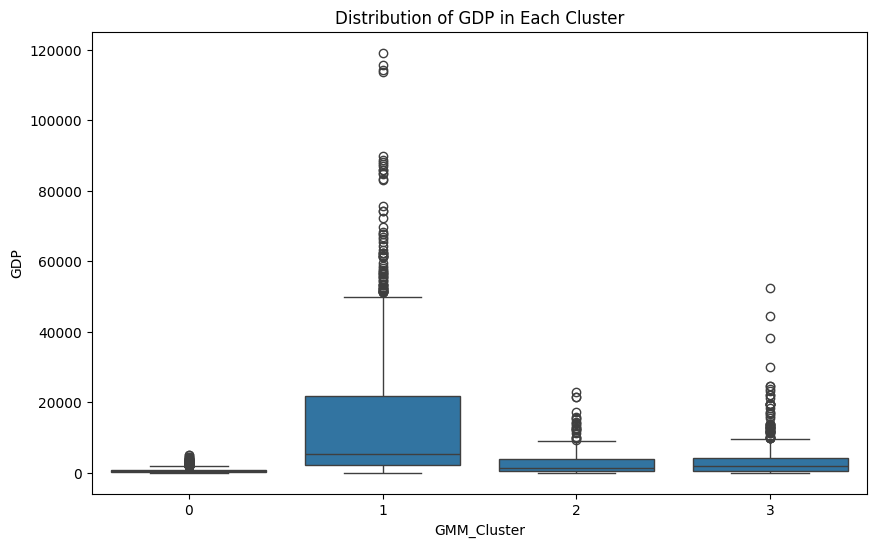

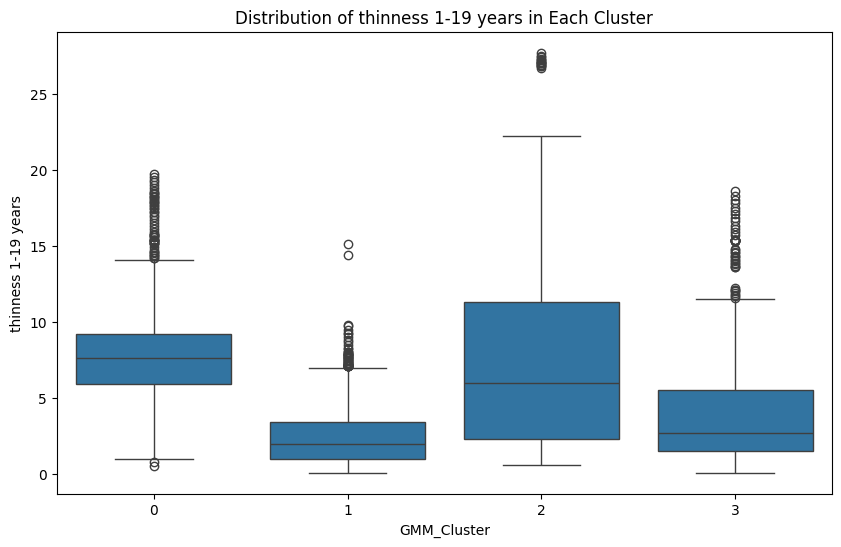

In [107]:

non_numeric_cols = data_with_pca.select_dtypes(exclude=[float, int]).columns

# Exclude non-numeric columns from the cluster profiling
numeric_data_with_pca = data_with_pca.drop(columns=non_numeric_cols)

# Profile each cluster by computing the mean of numeric columns
cluster_profiles = numeric_data_with_pca.groupby('DBS_Cluster').mean()
print(cluster_profiles)


# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='GMM_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()



# Results Summary and Conclusion

## Feature and Model Summary

Our original assumptions about some **features contributing** to life expectance turned out to be correct.

*   Countries with more resources generally had higher life expectancy
*   Countries that spent more on health care proportional to their GDP, had better life expectancy
*   Higher education also leads to better life expectancy
*   Malnutrition leads to lower life expectancy
*   Infant deaths lead to lower life expectancy


**Model Evaluation**

* KNN turned out to best model in clustering data for life expectancy
* We used score and elbow method to arrive at optimal number of clusters
* Model was able to pick better boundaries for clustering and those boundaries were in line with expected features


## Executive Summary

Based on what we saw from feature analysis and model results, we are able to provide following guidelines for stake holders:

*   **Malnutrition**: Focus on nutrition requirements of childern as it has lasting impact on life expectancy
*   **Education**: Better education leads to better life expectancy. This may indirectly be dependent on financial factors but some countries do have more emphasis on education than others for same financial state
*   **Money spent on health**: It may easily be dismissed as totally dependent on financial state of a given country but policy makers need to understand that money spent early on children health will ultimately lead to much more financial benefits to country as a whole also



